# Ноутбук для решения соревнования с курса DL
[ссылка на соревнование](https://www.kaggle.com/competitions/advanced-dls-spring-2021)

## 1. Подготовка данных

Импортируем библиотеки, которые понадобятся нам для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

Исследовательский анализ данных

In [3]:
df_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]
feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
df_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
df_train['TotalSpent'].value_counts().keys()

Index([' ', '20.2', '19.75', '20.05', '19.65', '19.9', '20.4', '75.3', '20.15',
       '45.3',
       ...
       '713', '1474.75', '24.25', '4265', '562.6', '41.85', '4326.25', '950.2',
       '4264', '1375.6'],
      dtype='object', length=4978)

In [8]:
df_train['TotalSpent'].replace(' ', 0, inplace=True)
df_test['TotalSpent'].replace(" ", 0, inplace=True)
df_train['TotalSpent'] = [float(x) for x in df_train['TotalSpent']]
df_test['TotalSpent'] = [float(x) for x in df_test['TotalSpent']]

In [9]:
df_train['TotalSpent'].value_counts()


0.00       9
20.20      9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.20     1
4264.00    1
1375.60    1
Name: TotalSpent, Length: 4978, dtype: int64

In [10]:
df_train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

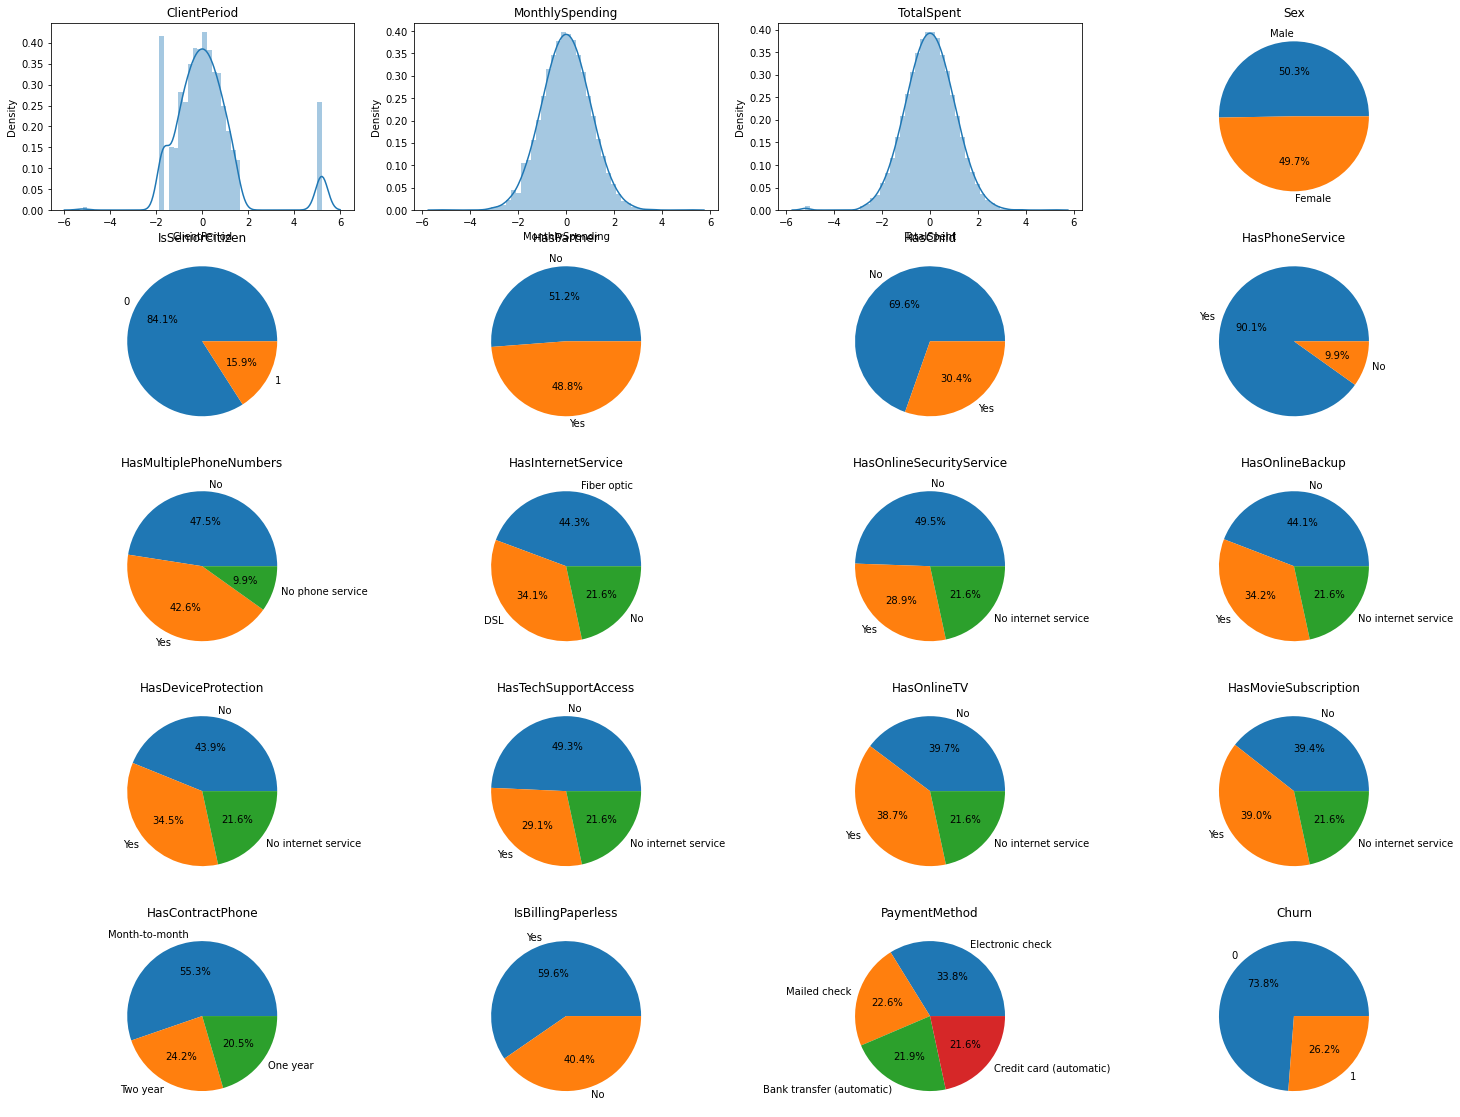

In [42]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
colors = sns.color_palette('pastel')[0:5]
for ax, col in zip(axes.flatten(), df_train.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(df_train[col].value_counts(), autopct="%1.1f%%", labels=df_train[col].value_counts().index)
    else:
        sns.distplot(df_train[col], ax=ax)

Из графиков, можно сделать логичное предположение, что в столбцах, где присутствуют значения "No internet service" и "No phone service" можно просто заменить на "No", так как смысл значения останется тот же

In [43]:
patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}
X = df_train.replace(patterns).drop(target_col, axis=1)
y = df_train[target_col]
X_test = df_test.replace(patterns)

## 2. Обучение на различных моделях машинного обучения

### Логистическая регрессия

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [45]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), #normalize data
    ('model', LogisticRegression(penalty="l2")) #classifier
])

p = {
    "model__C": [100] #np.logspace(-3,3,7)
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=p,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
)
logreg = grid_search.fit(X, y)

In [46]:
print(f"best score: {logreg.best_score_}")
print(f"best params: {logreg.best_params_}")

best score: 0.8467065913604201
best params: {'model__C': 100}


In [47]:
submission = pd.read_csv("data/submission.csv")
submission["Churn"] = logreg.predict_proba(X_test)[:, 1]
submission.to_csv("Submission/logreg.csv", index=False)

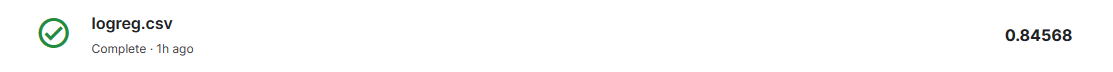

### CatBoost

In [48]:
from catboost import CatBoostClassifier

In [49]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000
)

PARAMS = {
    'l2_leaf_reg': [3], # [3, 5, 7, 10],
    "subsample": [0.3], # np.arange(0.1, 1, 0.05),
    "min_data_in_leaf": [100], #np.arange(10, 1001, 10),
    "n_estimators": [250], #[5, 10, 50, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05], #[0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4], #np.arange(4, 20, 1),
}
catboost.grid_search(PARAMS, X, y, cv=5, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8680858	best: 0.8680858 (0)	total: 13.7s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'depth': 4,
  'l2_leaf_reg': 3,
  'iterations': 250,
  'subsample': 0.3,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 249],
              'test-AUC-mean': [0.764868982604541, 0.8476441971454755],
              'test-AUC-std': [0.022158355707586872, 0.014646714480187537],
              'train-AUC-mean': [0.7744669530609045, 0.8711710296795123],
              'train-AUC-std': [0.01806639160763889, 0.0034307551238025556],
              'test-Logloss-mean': [0.6682409289398502, 0.41088725223538536],
              'test-Logloss-std': [0.0019064698859411627,
               0.017339618387821186],
              'train-Logloss-mean': [0.6678045573451934, 0.3834928827493974],
              'train-Logloss-std': [0.0018420891553211185,
               0.004531311856788893]})}

In [29]:
submission = pd.read_csv("data/submission.csv")
submission["Churn"] = catboost.predict_proba(X_test)[:, 1]
submission.to_csv("Submission/catboost.csv", index=False)

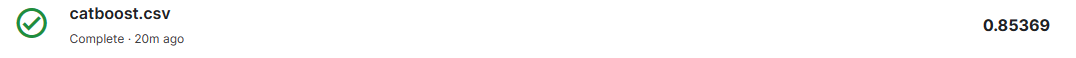

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(n_estimators=200, random_state=42)


PARAMS = {
    "min_samples_split": [9],  # range(2, 200),
    "min_samples_leaf": [18],  # range(1, 200),
}


grid_search = GridSearchCV(classifier, PARAMS, scoring="roc_auc", cv=5)
rf = grid_search.fit(X, y);

In [53]:
print(f"Best score: {rf.best_score_}")
print(f"Best params: {rf.best_params_}")
# 0.8433171488881694

Best score: 0.8433106697727538
Best params: {'min_samples_leaf': 18, 'min_samples_split': 9}


In [57]:
submission = pd.read_csv("data/submission.csv")
submission["Churn"] = rf.predict_proba(X_test)[:, 1]
submission.to_csv("Submission/random_forest.csv", index=False)

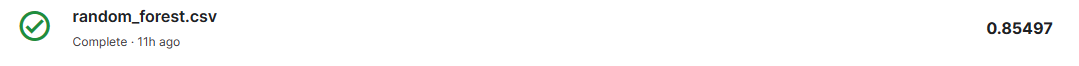

### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

In [55]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

PARAMS = {
    "model__n_neighbors": [75] #range(1, 100),
}

clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", KNeighborsClassifier()),
])
    
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=PARAMS,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10
)
knn = grid_search.fit(X, y)


In [56]:
print(f"Best score: {knn.best_score_}")
print(f"Best params: {knn.best_params_}")

Best score: 0.8394300393784928
Best params: {'model__n_neighbors': 75}


In [47]:
submission = pd.read_csv("data/submission.csv")
submission["Churn"] = knn.predict_proba(X_test)[:, 1]
submission.to_csv("Submission/knn.csv", index=False)

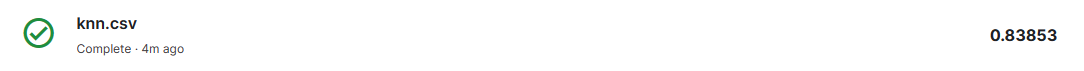

### Stacking

In [35]:
from sklearn.ensemble import StackingClassifier

In [50]:
final = CatBoostClassifier(
    logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    metric_period=1000,
    random_seed=0,
    grow_policy="Depthwise",
    l2_leaf_reg=1,
    learning_rate=0.05,
    max_depth=15,
    min_data_in_leaf=10,
    n_estimators=20,
    random_strength=11,
    subsample=0.1,
)

stacking = StackingClassifier(
    estimators=[
        ("logreg", logreg),
        ("rf", rf),
        ("catboost", catboost),
        ("knn", knn)
    ],
    final_estimator=final,
    n_jobs=-1,
)

stacking.fit(X, y)

StackingClassifier(estimators=[('logreg',
                                GridSearchCV(cv=10,
                                             estimator=Pipeline(steps=[('scaler',
                                                                        StandardScaler()),
                                                                       ('model',
                                                                        LogisticRegression())]),
                                             n_jobs=-1,
                                             param_grid={'model__C': [100]},
                                             scoring='roc_auc')),
                               ('rf',
                                GridSearchCV(cv=5,
                                             estimator=RandomForestClassifier(n_estimators=200,
                                                                              random_state=42),
                                             param_grid={'min_samples_leaf'

In [51]:
y_pred = stacking.predict_proba(X_test)[:, 1]
submission = pd.read_csv("data/submission.csv")
submission['Churn'] = y_pred
submission.to_csv("Submission/final.csv", index=False)

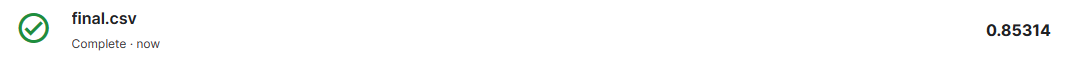

## 3. Заключение

Из полученных результатов можно сделать вывод, что самый лучшый результат у Random Forest. Stacking, который как казалось, должен обобщить модели и сделать результат еще лучше, оказался менее точным, чем Random Forest. 
Возможно перебрав еще больше гипперпараметров, можно повысить качество решения. В особенности это касается алгоритма CatBoost.